In [1]:
import sparkle
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bagpy
from bagpy import bagreader
from strym import strymread

[2021_10_11_00_29_12] (rospy.topics) INFO: topicmanager initialized
[2021_10_11_00_29_13] (gnupg) INFO: Log opened: Mon Oct 11 07:29:13 2021 UTC


Loading BokehJS ...

In [3]:
bagfiles_collected = []
folder = '/home/refulgent/Cyverse/sparkle/'
## these with rtf 0.5
#bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_50.0_time_step_0.01_recordtime_90.0_2021-10-10-21-25-41.bag')
#bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_50.0_time_step_0.01_recordtime_90.0_2021-10-10-21-34-40.bag')

## these with rtf 0.4
# bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-22-08-32.bag')
# bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-22-15-16.bag')
# bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-22-25-07.bag')
# bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-22-30-26.bag')

## these after correcting leadervel publishing
bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-23-15-24.bag')
bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-23-15-24.bag')
bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-23-27-48.bag')
bagfiles_collected.append(folder + 'sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-23-42-12.bag')

In [4]:
cmd_speed =[]
speed = []
posX = []
lead_dist = []
rel_vel = []

for bf in bagfiles_collected:
    B = bagreader(bf)
    
    cmd_speed_b = []
    speed_b = []
    odom_b = []
    lead_dist_b = []
    relvel_b = []
    for i in range(0, 4):
            print(i)
            cmdvel_file = B.message_by_topic('/sparkle_00{}/cmd_vel'.format(i))
            cmdvel = pd.read_csv(cmdvel_file)
            cmd_speed_b.append(cmdvel)
            
            vel_file = B.message_by_topic('/sparkle_00{}/vel'.format(i))
            vel = pd.read_csv(vel_file)
            speed_b.append(vel)
            
            odom_file = B.message_by_topic('/sparkle_00{}/odom'.format(i))
            odom = pd.read_csv(odom_file)
            odom_b.append(odom)
            
            lead_dist_file = B.message_by_topic('/sparkle_00{}/lead_dist'.format(i))
            lead_distance = pd.read_csv(lead_dist_file)
            lead_dist_b.append(lead_distance)
            
            relvel_file = B.message_by_topic('/sparkle_00{}/rel_vel'.format(i))
            relvel = pd.read_csv(relvel_file)
            relvel_b.append(relvel)
            
    cmd_speed.append(cmd_speed_b)
    speed.append(speed_b)
    posX.append(odom_b)
    lead_dist.append(lead_dist_b)
    rel_vel.append(relvel_b)

version
200
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-23-15-24 already exists. Not creating.
0
1
2
3
version
200
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-23-15-24 already exists. Not creating.
0
1
2
3
version
200
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-23-27-48 already exists. Not creating.
0
1
2
3
version
200
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_40.0_time_step_0.01_recordtime_90.0_2021-10-10-23-42-12 already exists. Not creating.
0
1
2
3


/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



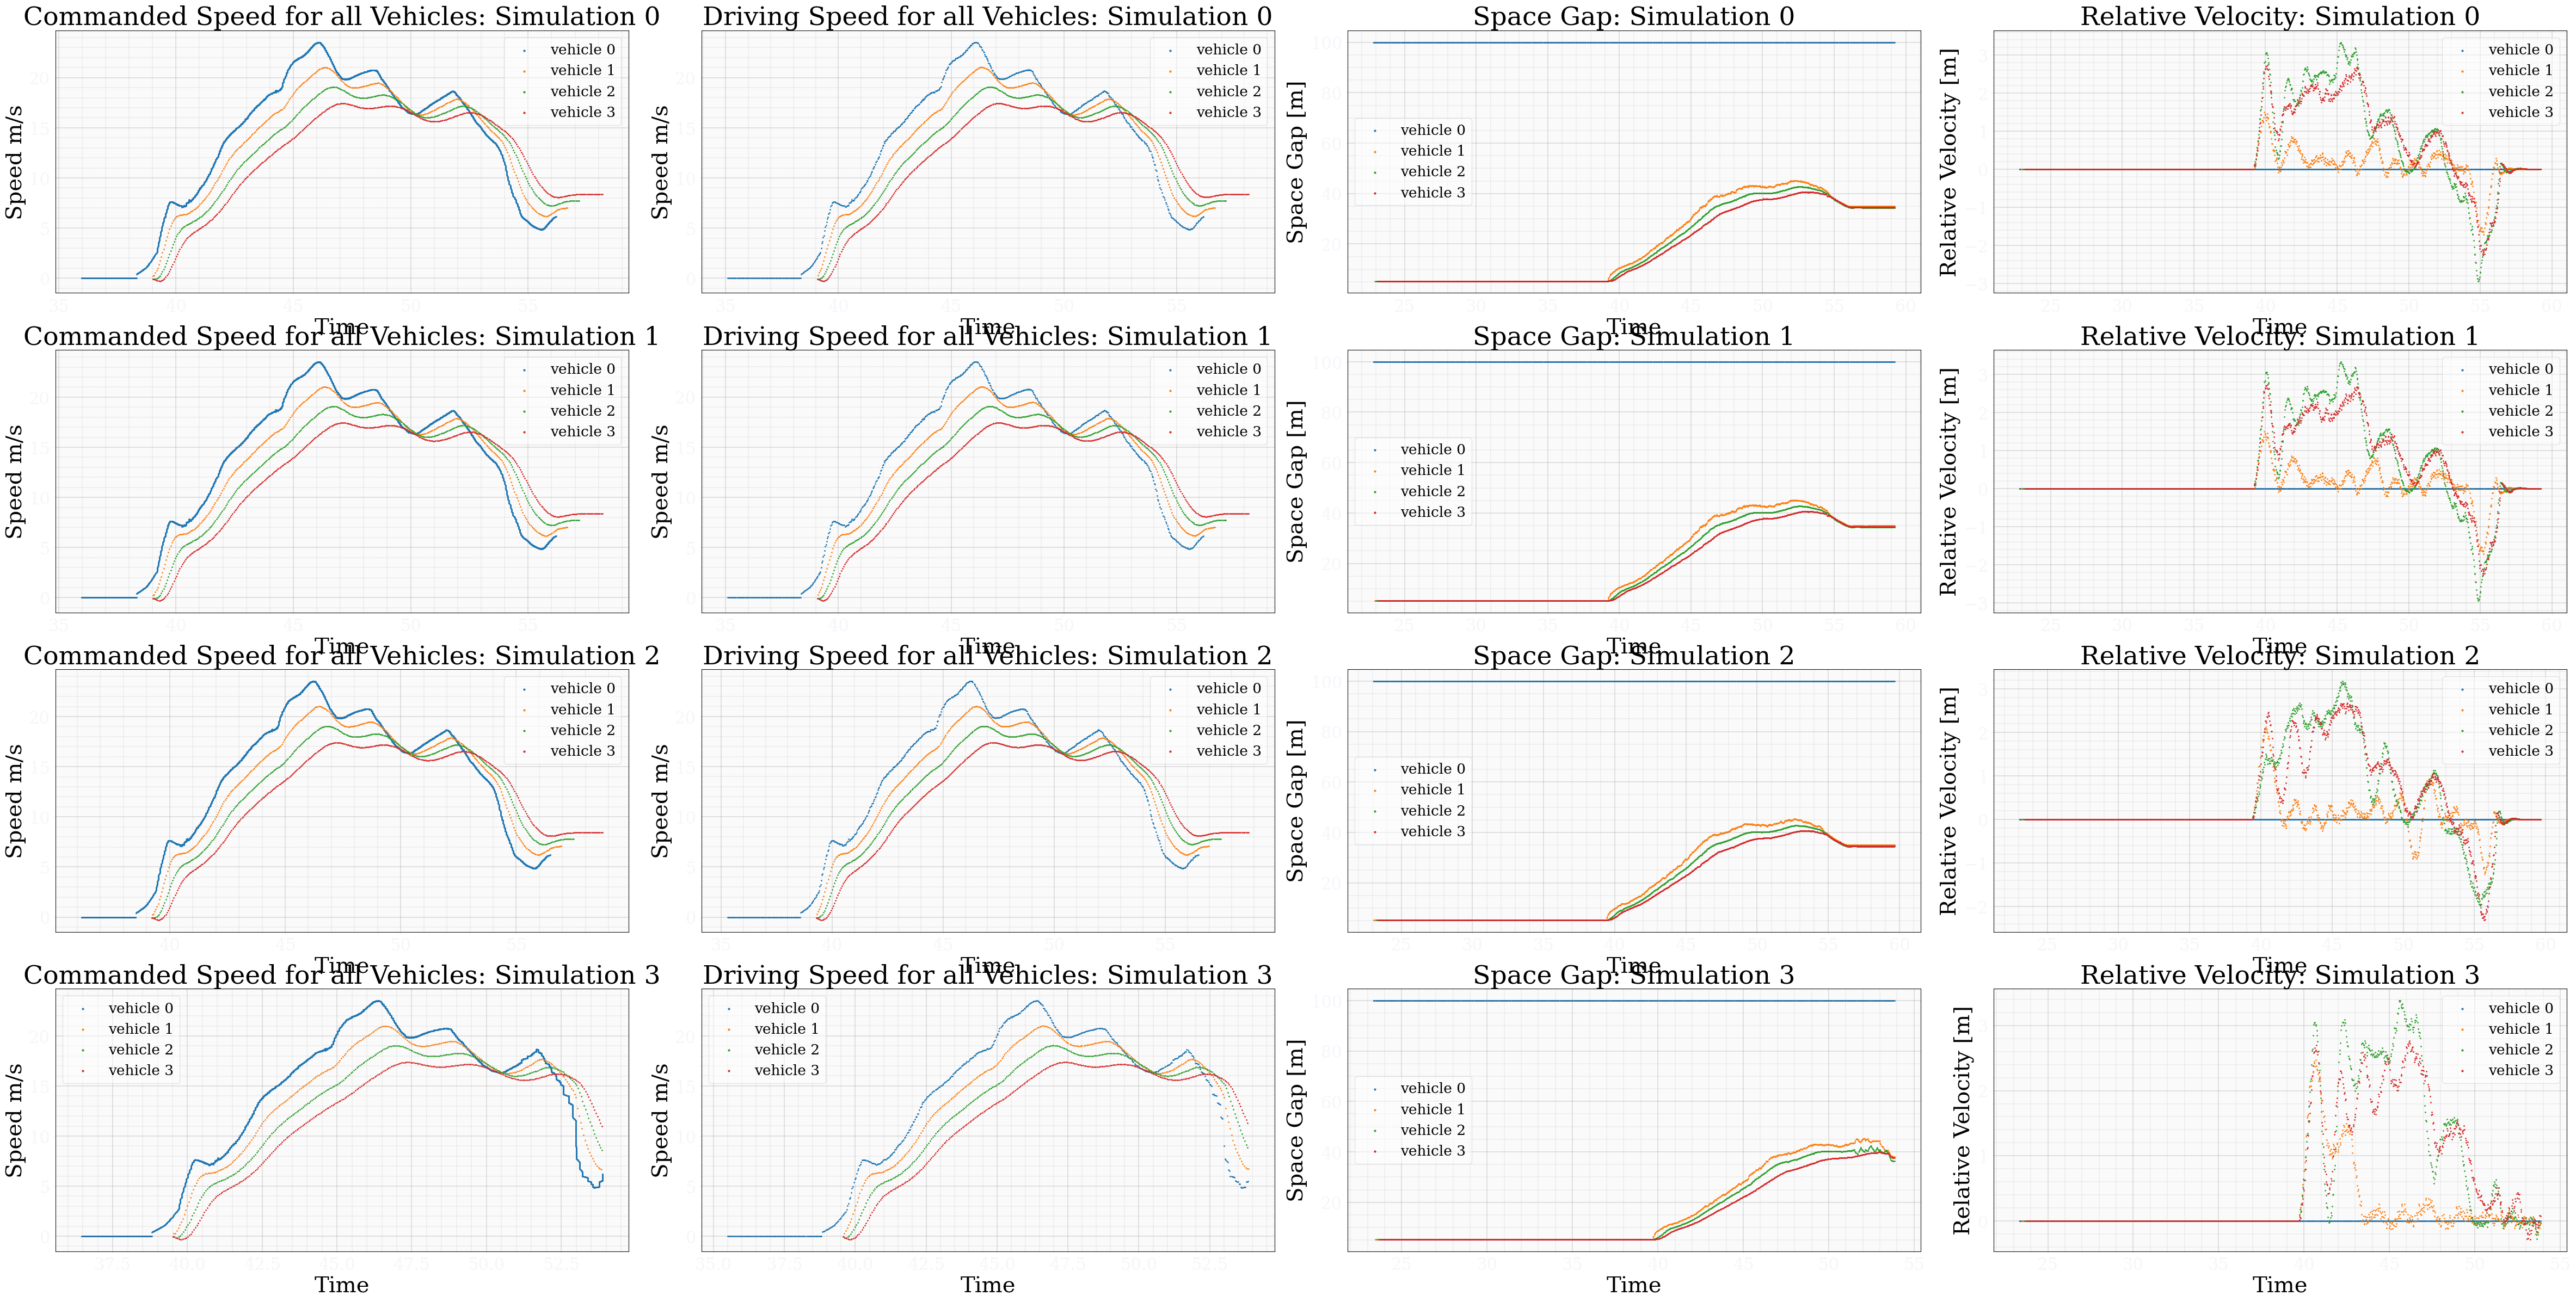

In [5]:
# Simulation 0 Data
%matplotlib inline

fig, ax = bagpy.create_fig(nrows = len(cmd_speed), ncols = 4 )
ax = ax.reshape(len(cmd_speed), 4 )
for j in range(0, len(cmd_speed)):
    
    cs = cmd_speed[j]
    s = speed[j]
    ld = lead_dist[j]
    rv = rel_vel[j]
    
    for i, v in enumerate(cs):
        ax[j, 0].scatter(x = 'Time', y = 'linear.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 0].legend()
        ax[j, 0].set_xlabel('Time')
        ax[j, 0].set_ylabel('Speed m/s')
        ax[j, 0].set_title('Commanded Speed for all Vehicles: Simulation {}'.format(j))

#     fig, ax = bagpy.create_fig(1)
    for i, v in enumerate(s):
        ax[j, 1].scatter(x = 'Time', y = 'linear.x', data = s[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 1].legend()
        ax[j, 1].set_xlabel('Time')
        ax[j, 1].set_ylabel('Speed m/s')
        ax[j, 1].set_title('Driving Speed for all Vehicles: Simulation {}'.format(j))

#     fig, ax = bagpy.create_fig(1)
    for i, v in enumerate(ld):
        ax[j, 2].scatter(x = 'Time', y = 'data', data = ld[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 2].legend()
        ax[j, 2].set_xlabel('Time')
        ax[j, 2].set_ylabel('Space Gap [m]')
        ax[j, 2].set_title('Space Gap: Simulation {}'.format(j))

#     fig, ax = bagpy.create_fig(1)
    for i, v in enumerate(rv):
        ax[j, 3].scatter(x = 'Time', y = 'linear.z', data = rv[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 3].legend()
        ax[j, 3].set_xlabel('Time')
        ax[j, 3].set_ylabel('Relative Velocity [m]')
        ax[j, 3].set_title('Relative Velocity: Simulation {}'.format(j))
        
fig.show()

# Overlaid plot of same vehicle trajectory

[2021_10_10_23_48_24] (numexpr.utils) INFO: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2021_10_10_23_48_24] (numexpr.utils) INFO: NumExpr defaulting to 8 threads.
[2021_10_10_23_48_24] (root) INFO: Zero pass correlation coefficient  = (0.9999999999999998, 0.0)
[2021_10_10_23_48_25] (root) INFO: Zero pass correlation coefficient  = (0.9995765887541135, 0.0)
[2021_10_10_23_48_25] (root) INFO: Zero pass correlation coefficient  = (0.965366554926892, 0.0)
Vehicle: 0
Vehicle: 1
Vehicle: 2
Vehicle: 3


/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



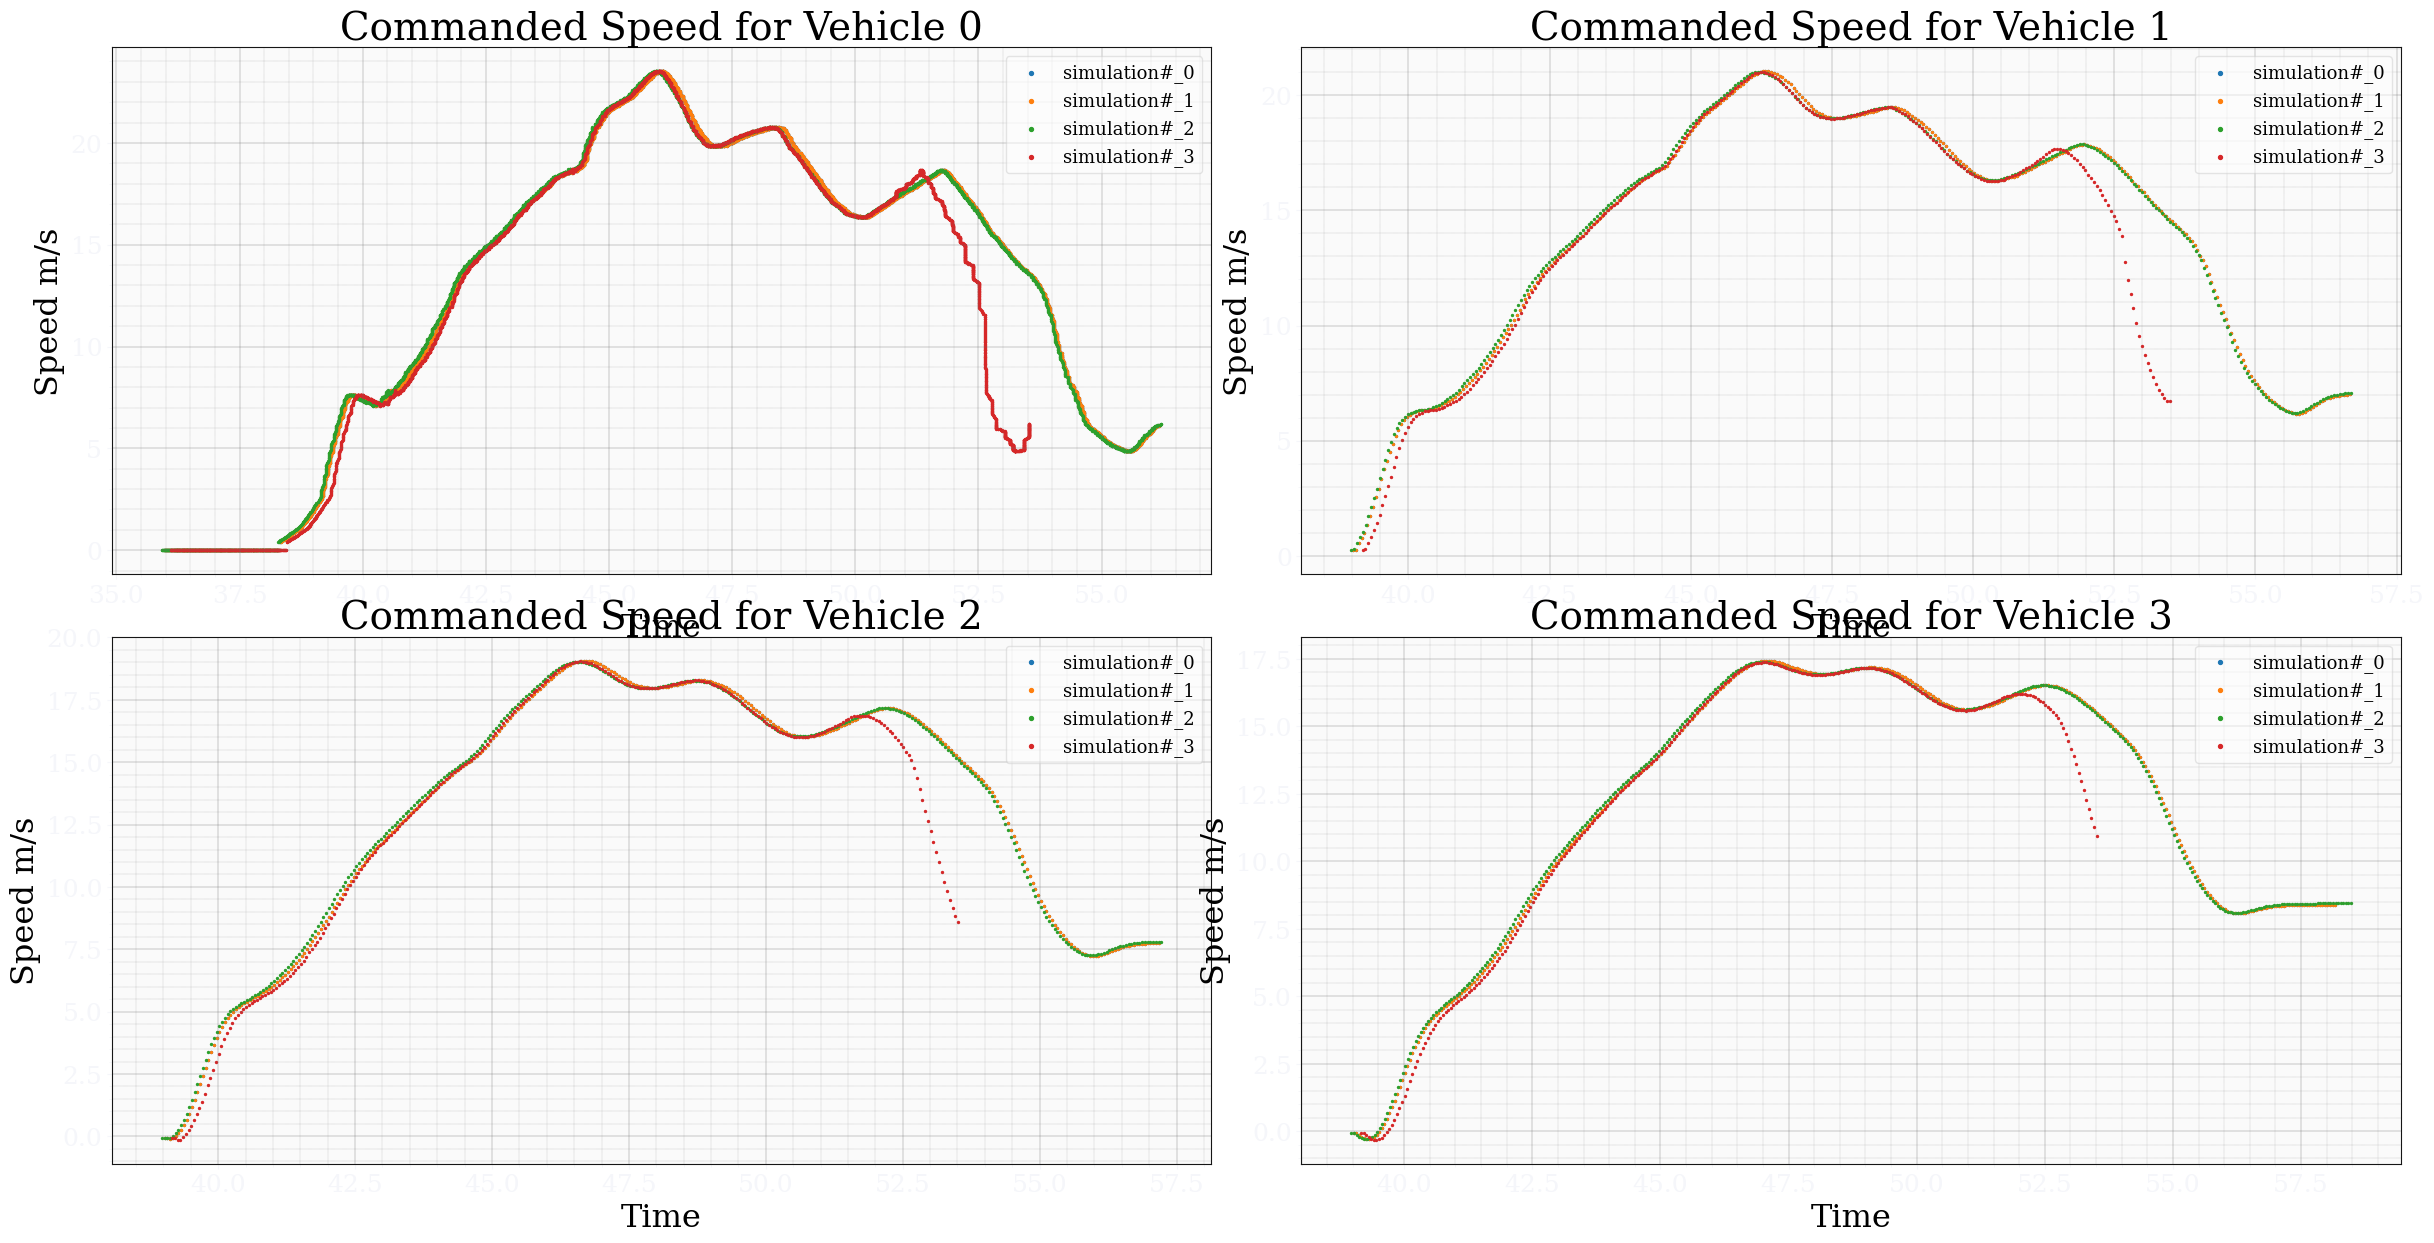

In [6]:
fig, ax = bagpy.create_fig(ncols = 2, nrows = 2)

p = [0]    
for k in range(1, len(cmd_speed)):
    p1 = strymread.time_shift(df1=cmd_speed[0][0], df2=cmd_speed[k][0], msg_col1 = 'linear.x', msg_col2='linear.x')
    p.append(p1)

for j in range(0, len(cmd_speed[0])):
    
    print('Vehicle: {}'.format(j))
    for k in range(0, len(cmd_speed)):
        ax[j].scatter(x = cmd_speed[k][j]['Time']  + p[k], y = cmd_speed[k][j]['linear.x'],  s = 2, label = 'simulation#_{}'.format(k))
    
    ax[j].legend()
    ax[j].set_xlabel('Time')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for Vehicle {}'.format(j))
    fig.show()